### 데이터 다운로드 및 세팅

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('./dataset/train_bike.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings #경고창 안뜨게 하는 코드 
warnings.filterwarnings("ignore",category=RuntimeWarning)


(10886, 12)


### 데이터 정보 탐색

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 데이터 전처리

In [7]:
#object 타입으로 된 문자열을 datetime 으로 변경하기 
df['datetime'] = df.datetime.apply(pd.to_datetime) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### featrue extraction
-  featrue를 종합해 새로운 대표적인 피쳐를 생성 

In [11]:
df['datetime'][0]

Timestamp('2011-01-01 00:00:00')

In [12]:
df['datetime'][0].year

2011

In [15]:
###datetime 타입에서 년 월 일 시간 추출 

df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x: x.month)
df['day'] = df.datetime.apply(lambda x: x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
#불필요한 컬럼 삭제 

drop_columns = ['datetime','casual','registered']
df.drop(drop_columns,axis=1,inplace=True)


In [18]:
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


### 에러 함수들 정의 후 선형회귀 학습/ 예측 

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


## 코드 재사용을 고려해 만들기! 

#log 값 변환 시 NAN 등의 이슈로 log가 아닌 log1p() 를 이용하여 RMSLE로 계산
# 그냥 로그값을 쓰면 x = 0일때 자연함수 e 때문에 y가 무한대로 수렴하게 된다. (즉 값이 안나와서 에러난다.)
# 이걸 막기 위해서 x + 1 을 해주는 함수가 log1p다. 

def rmsle(y, pred):
    log_y= np.log1p(y)
    log_pred = np.log1p(pred) #음수값을 양수로 바꿔 저장
    squraed_error = (log_y - log_pred) ** 2 #제곱 
    rmsle = np.sqrt(np.mean(squraed_error))
    return rmsle

#사이킷런의 mean-square_error()를 이용해 RMSE 계산 
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    #MAE는 사이킷런의 MAE로 계산 
    mae_val = mean_absolute_error(y,pred)
    print(f'RMSLE:{rmsle_val:.3f},RMSE:{rmse_val:.3f}, MAE:{mae_val:.3f}')



In [25]:
#학습데이터, 테스트 데이터 분리 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#테스트와 트레인셋이 분리되지 않았다면 분리해준다. 
y_target = df['count']
x_feature = df.drop(['count'],axis=1,inplace=False)

X_train,X_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=.3 ,random_state=0)

#선형회귀 적용 후 학습/ 예측/ 평가 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE:1.165,RMSE:140.900, MAE:105.924


RMSLE에 비해 RMSE값이 매우 크게 나왔다. 예측 에러가 매우 큰 값들이 섞여 있기 때문이다. 

In [38]:
#실제 값과 예측 값의 차이 비교 

def get_top_error_data(y_test, pred,n_tops =5):
    #dataframe에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교 할 수 있도록 생성 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] =np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']- result_df['predicted_count'])
    #예측값과 실제값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops]) #top으로 받은 인자 수만큼만 출력 


get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


### 타겟값에 정규화

정규화를 통해 치우침 정도 확인, 선형회귀는 정규분포 상태에서 예측률이 좋다. 

<AxesSubplot:>

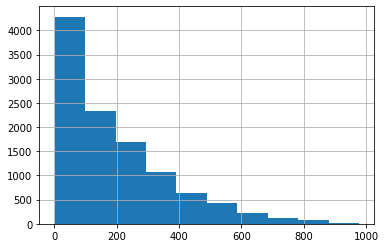

In [40]:
# 히스토그램을 그려 치우침 정도 확인 
y_target.hist()

<AxesSubplot:>

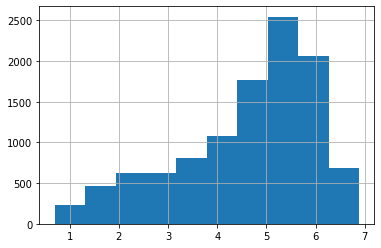

In [41]:
# 로그 씌워서 정규화 하기 
y_log_trasform = np.log1p(y_target)
y_log_trasform.hist()
#완전하진 않지만 그래도 정규화를 통해 이전보다 왜곡은 안정된 모습

Text(0.5, 1.0, 'AFTER')

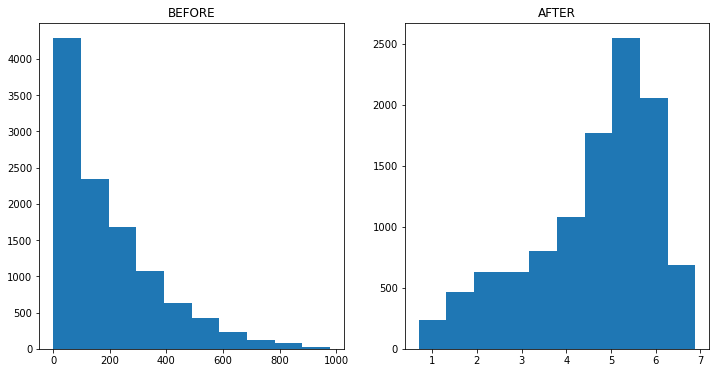

In [66]:
plt.figure(figsize=(12,6), facecolor='w')
plt.subplot(1,2,1)
plt.hist(y_target)
plt.title('BEFORE')

plt.subplot(1,2,2)
plt.hist(np.log1p(y_target))
plt.title('AFTER')

In [44]:
#타겟 컬럼인 count 값을 log1p로 log 변환 
y_target_log = np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/테스트 데이터 셋 분할
X_train,X_test,y_train,y_test = train_test_split(x_feature,y_log_trasform,test_size=0.3,random_state=9)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred  = lr_reg.predict(X_test)

#테스트 데이터 셋의 target 값은 log 변환되었으므로 다시 exam1를 이용해 원래 scale로 변환 
y_test_exp = np.expm1(y_test)

#예측 값 역시 log 변환된 티켓 기반으로 학습되어 예측되었으므로 다시 exmp1으로 scale변환 
pred_exp = np.expm1(pred)
# 왜 다시 되돌리는가? 

# meanmax 한 값은 그 상태 그래대로 오차가 진행되지만 
# # 로그는 축 자체를 옆으로 shift 한 것이기 때문에 
# 로그를 씌우건 씌우지 않은 식의 벌어진 간격은 그대론데, 
# 오차값은 로그씌운 값과 원래 데이터의 오차값이 다르다. 
# 따라서 정규화 한 모델로 학습한 것을 원래데이터로 풀어줌으로써 
# 오차값이 더 떨어져 효과가 있는 모델인지 확인할 수 있게 된 것이다. 


evaluate_regr(y_test_exp, pred_exp) 
#RMSLE는 감소 RMSE는 증가했다. 

RMSLE:1.038,RMSE:164.565, MAE:110.558


<AxesSubplot:>

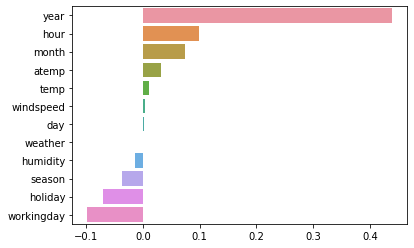

In [45]:
#피쳐 별 회귀 계수 확인 

coef  = pd.Series(lr_reg.coef_,index=x_feature.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot (x=coef_sort.values, y=coef_sort.index)


년원일시를 나타내는 피쳐는 카테고리형 피처지만 숫자형으로 되어있다. 
숫자형 카테고리값은 선형 회귀에 사용할 경우 숫자형 값에 영향을 크게 받을 수 있으므로 원- 핫 인코딩을 적용해야 한다. 



year(2011, 2012)가 영향력이 큰 것을 볼 수 있다. 해당 데이터는 2011년에 창업한 스타트업으로 2012년부터 대여 수요량이 늘어났다. 

#### 원 핫 인코딩 후 다시 학습/ 예측 

In [55]:
#'year','month','hour','season','weather','feature'들을 one hot encoding 
x_feature_ohe = pd.get_dummies(x_feature, columns=['year','month','hour','holiday','workingday','season','weather'])

#원 핫 인코딩이 적용된 피쳐 데이터 세트 기반으로 학습/ 예측 
X_train,X_test,y_train,y_test = train_test_split(x_feature_ohe,y_target_log,test_size=0.3,random_state=0)



def get_model_predict(model, X_train, X_test,y_train,y_test, is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:  
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
#end of function get_model_predict

#model별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)


### LinearRegression ###
RMSLE:0.589,RMSE:97.482, MAE:63.105
### Ridge ###
RMSLE:0.589,RMSE:98.407, MAE:63.648
### Lasso ###
RMSLE:0.634,RMSE:113.031, MAE:72.658


In [65]:
x_feature_ohe

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,19,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


원 핫 인코딩후 성능 향상을 확인할 수 있다. LinearRegression  성능이 가장 좋다. 

<AxesSubplot:>

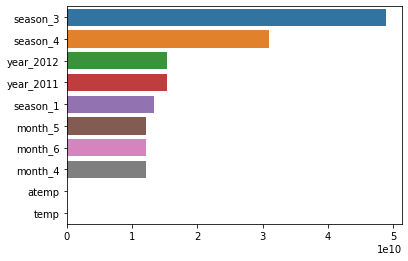

In [57]:
# 각 피쳐의 회귀 계수 시각화 
# 선형 회귀시 피처를 어떻게 인코딩 하느냐가 중요하다. 

coef = pd.Series(lr_reg.coef_,index=x_feature_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [63]:
x_feature_ohe.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'day', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [62]:
pd.Series(lr_reg.coef_)

0     1.152483e-02
1     1.215082e-02
2    -3.355254e-03
3    -3.726117e-03
4     3.540128e-03
5     1.531397e+10
6     1.531397e+10
7    -4.113848e+09
8    -4.113848e+09
9    -4.113848e+09
10    1.213804e+10
11    1.213804e+10
12    1.213804e+10
13   -3.959142e+10
14   -3.959142e+10
15   -3.959142e+10
16   -2.176084e+10
17   -2.176084e+10
18   -2.176084e+10
19   -8.207527e+08
20   -8.207527e+08
21   -8.207527e+08
22   -8.207527e+08
23   -8.207527e+08
24   -8.207527e+08
25   -8.207527e+08
26   -8.207527e+08
27   -8.207527e+08
28   -8.207527e+08
29   -8.207527e+08
30   -8.207527e+08
31   -8.207527e+08
32   -8.207527e+08
33   -8.207527e+08
34   -8.207527e+08
35   -8.207527e+08
36   -8.207527e+08
37   -8.207527e+08
38   -8.207527e+08
39   -8.207527e+08
40   -8.207527e+08
41   -8.207527e+08
42   -8.207527e+08
43   -1.399740e+09
44   -1.399740e+09
45   -4.190021e+09
46   -4.190021e+09
47    1.340589e+10
48   -2.845994e+09
49    4.888347e+10
50    3.105289e+10
51   -1.120284e+10
52   -1.1202

In [60]:
coef_sort.values

array([4.88834675e+10, 3.10528864e+10, 1.53139695e+10, 1.53139695e+10,
       1.34058943e+10, 1.21380405e+10, 1.21380405e+10, 1.21380405e+10,
       1.21508183e-02, 1.15248290e-02])

In [59]:
coef_sort.index

Index(['season_3', 'season_4', 'year_2012', 'year_2011', 'season_1', 'month_5',
       'month_6', 'month_4', 'atemp', 'temp'],
      dtype='object')